**I. Data Loading and Preprocessing**

1. Load the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
df = pd.read_csv('onlinefoods.csv')
print (df.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

2. Handling missing values

In [ ]:
print (df.isnull().sum())

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


3. Encode categorical values

In [ ]:
df_encoded = pd.get_dummies(pd, columns = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Output', 'Feedback'])
print (df_encoded.head())

   <module 'pandas' from '/usr/local/lib/python3.10/dist-packages/pandas/__init__.py'>
0                                                  1                                  


4. Feature selection

In [ ]:
X = df.drop(['Feedback'], axis=1)
y = df['Feedback']
X = pd.get_dummies(X, drop_first=True)

selected_features = ['Age', 'Gender_Female', 'Gender_Male', 'Marital Status_Single', 'Marital Status_Married',
                     'Occupation_Student', 'Occupation_Working Professional', 'Monthly Income_No Income',
                     'Monthly Income_Below Rs.10000', 'Monthly Income_Rs.10000 - Rs.20000',
                     'Educational Qualifications_Graduate', 'Educational Qualifications_Post Graduate']


**Part II. Explanatory Data Analysis**

1. Descriptive statistics

In [ ]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


2. Visualization

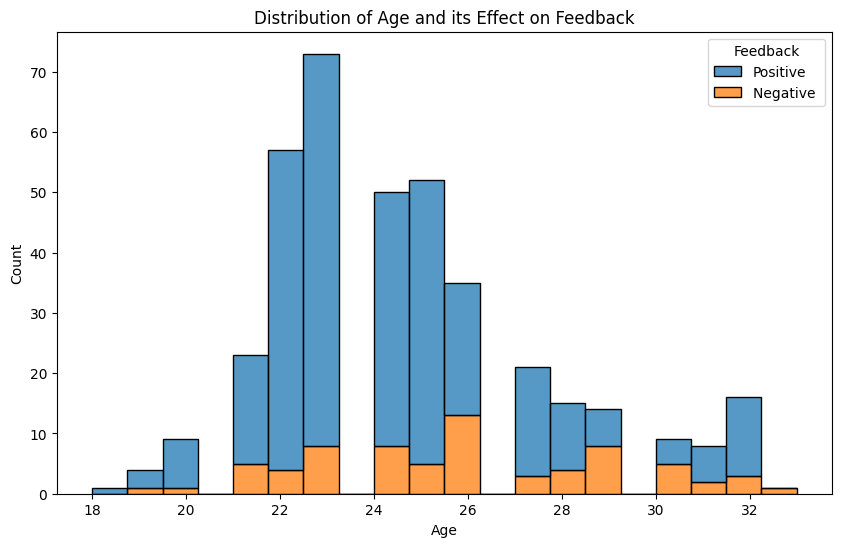

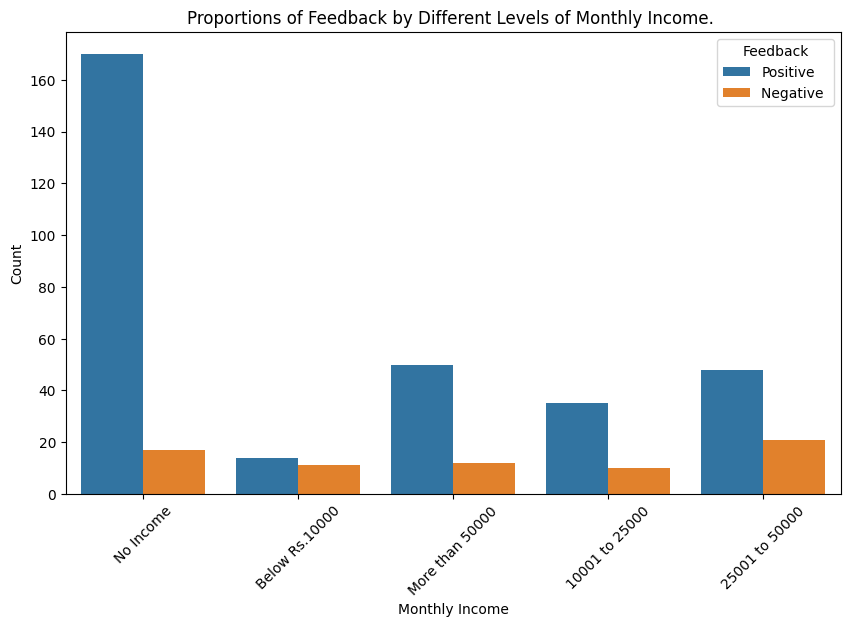

<ipython-input-11-a6f4583420a3>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='PuOr', fmt=".2f")


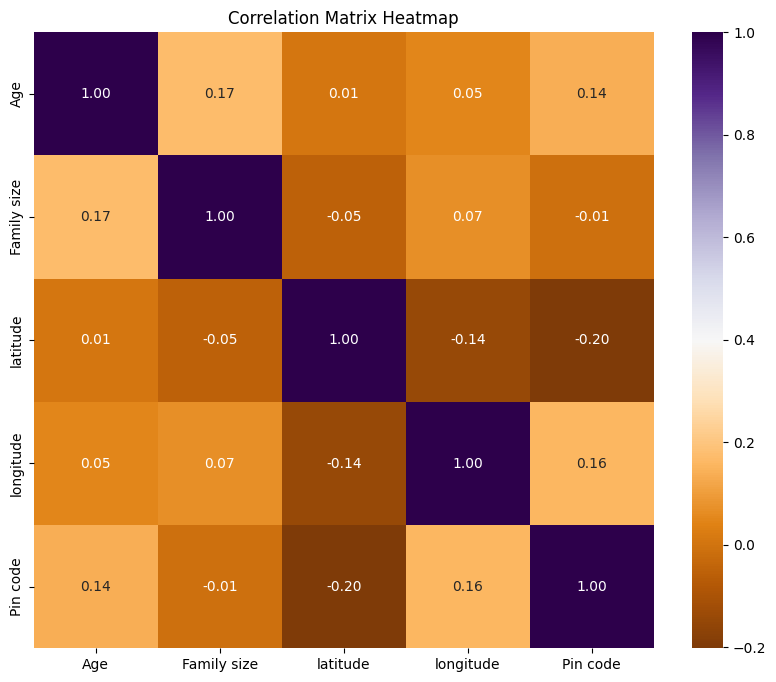

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Feedback', multiple='stack', bins=20)
plt.title('Distribution of Age and its Effect on Feedback')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Monthly Income', hue = 'Feedback')
plt.title('Proportions of Feedback by Different Levels of Monthly Income. ')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='PuOr', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


**Part III. Logistic Regression Model**

1. Build the model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


2. Model evaluation

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Positive')
recall = recall_score(y_test, y_pred, pos_label='Positive')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8589743589743589
Precision: 0.8589743589743589
Recall: 1.0
Confusion Matrix:
 [[ 0 11]
 [ 0 67]]


**Part IV. Data Analysis and Visualization**

1. Feature importance

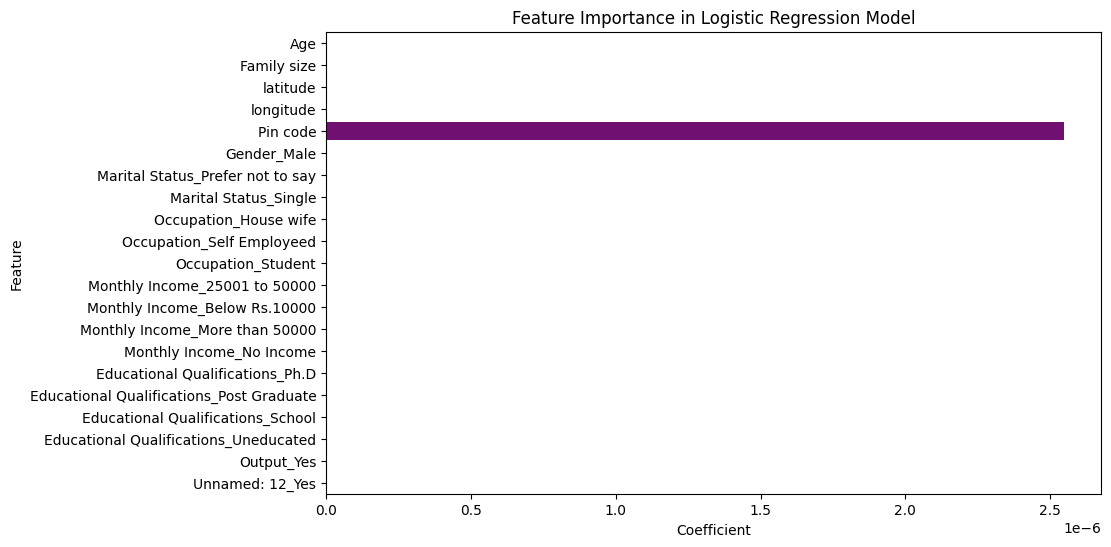

In [ ]:
coefficients = model.coef_[0]

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_important_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Coefficient', y='Feature', color='purple')
plt.title('Feature Importance in Logistic Regression Model')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

print(feature_importance_df)


2. Prediction insights

                                     Feature   Coefficient
0                                        Age -1.360386e-11
1                                Family size  1.134506e-11
2                                   latitude  5.762156e-11
3                                  longitude  3.536041e-10
4                                   Pin code  2.548236e-06
5                                Gender_Male -1.515162e-12
6           Marital Status_Prefer not to say -4.511936e-12
7                      Marital Status_Single  2.300650e-11
8                      Occupation_House wife  3.506956e-13
9                  Occupation_Self Employeed -7.951218e-12
10                        Occupation_Student  2.345742e-11
11             Monthly Income_25001 to 50000 -7.559011e-12
12             Monthly Income_Below Rs.10000 -8.055376e-12
13            Monthly Income_More than 50000 -1.089569e-12
14                  Monthly Income_No Income  2.207579e-11
15           Educational Qualifications_Ph.D -1.544205e-

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


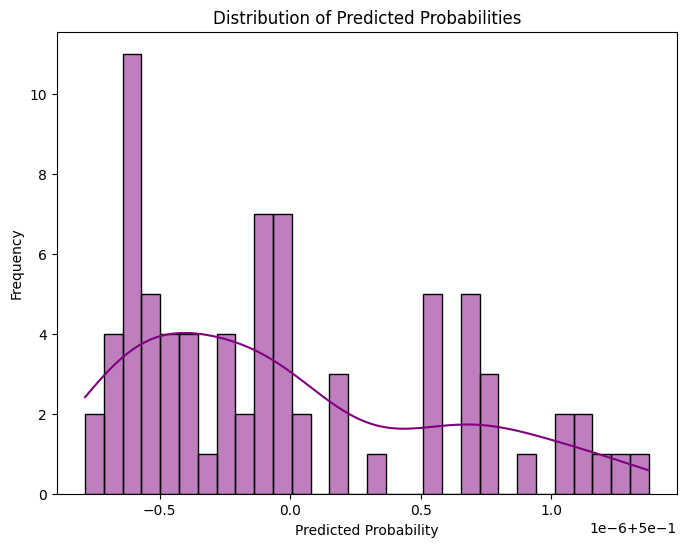

In [ ]:
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

plt.figure(figsize=(8,6))
sns.histplot(y_pred_proba, bins=30, kde=True, color='purple')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()


**Conclusion:**

**Part I.**

In part 1 of my code, I have imported all the libraries needed in the entire code. I also imported the onlinefood.csv dataset. Here in first part, it includes the code for handling missing values, encoding categorical variables, as well as selecting relevant features to make sure if the dataset is suitable for modeling.

**Part II.**
In part 2, this is where I have used the pd.describe()method to summarize the numeric columns. Also I have visualized the relationships between different features and customer feedback to help understand the factors influencing the customers' feedback.

**Part III**
In part 3, this is where I have utilized the logistic regression model (model) to make predictions (y_pred) on the test set. These predictions represent the model's estimation of whether each online food order would receive positive or negative feedback.

**Part IV**
In part 4, this is where I have visualized the distribution of predicted probabilities (y_pred_proba) of the positive class (positive feedback) for each instance in the test set. As you can see on the **feature importance,** the reason why it's a straight horizontal line near the pin code, is because the pin code is less likely significant and it does not neccesarily affect the customers' feedback, concluding that it has also zero coefficients. On the next part, this is where I have also created a visualization for the distribution of predicted probabilities and see any pattern. In other words, the code for part 4 allows for an understanding of the model's confidence in its predictions.

Therefore I  conclude that the number of customers who have negative feedback is 11 and customers who have positive feedback is 67 based on the confusion matrix.